In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
data = np.genfromtxt('./joy.txt')
data

array([[-1.72, -3.12,  1.  ],
       [ 0.31,  1.85,  1.  ],
       [ 1.56,  2.85,  1.  ],
       [ 2.64,  2.41,  1.  ],
       [ 1.23,  2.54,  1.  ],
       [ 1.33,  2.03,  1.  ],
       [ 1.26,  2.68,  1.  ],
       [ 2.58,  1.79,  1.  ],
       [ 2.4 ,  0.91,  1.  ],
       [ 0.51,  2.44,  1.  ],
       [ 2.17,  2.64,  1.  ],
       [ 3.38,  2.94,  1.  ],
       [ 1.09,  3.12,  1.  ],
       [ 0.68,  1.43,  1.  ],
       [ 3.76,  0.64,  1.  ],
       [ 0.73,  2.97,  1.  ],
       [ 0.53,  2.94,  1.  ],
       [ 1.49,  1.25,  1.  ],
       [ 3.92,  3.48,  1.  ],
       [ 3.87,  2.91,  1.  ],
       [ 1.14,  3.01,  1.  ],
       [ 1.73,  2.8 ,  1.  ],
       [ 2.96,  1.84,  1.  ],
       [ 2.61,  2.92,  1.  ],
       [ 2.28,  0.9 ,  1.  ],
       [ 1.93,  3.71,  1.  ],
       [ 1.26,  1.17,  1.  ],
       [ 1.9 ,  1.34,  1.  ],
       [ 3.13,  0.92,  1.  ],
       [ 0.85,  1.46,  1.  ],
       [ 1.5 ,  3.93,  1.  ],
       [ 2.95,  2.09,  1.  ],
       [ 0.76,  2.84,  1.  ],
       [ 1

In [9]:
data = np.genfromtxt('./joy.txt')
np.random.shuffle(data)
x, y = data[:, :2], data[:, 2]
y = y.astype(np.int)
print(x[:5], y[:5])
print(x[-5:], y[-5:])

[[-3.45 -0.62]
 [ 1.54  2.02]
 [-1.64 -1.11]
 [-1.05 -3.85]
 [ 2.52  1.83]] [0 1 0 0 1]
[[-2.92 -2.51]
 [ 1.49  1.25]
 [-0.11 -3.43]
 [ 0.25 -1.26]
 [ 0.53  2.94]] [0 1 0 0 1]


C:\Users\hanna\AppData\Local\Temp\ipykernel_20708\3382126866.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.int)


In [10]:
xmax = np.max(x)
xmin = np.min(x)
x = (x - xmin) / (xmax - xmin)

In [11]:
mu = x.mean(axis = 0)
sigma = x.std(axis = 0)
x = (x - mu) / sigma

In [ ]:
# 테스트

In [27]:
import numpy as np
data = np.genfromtxt('./joy.txt')
np.random.seed(1)
np.random.shuffle(data)
x, y = data[:, :2], data[:, 2]
y = y.astype(np.int)

num = int(x.shape[0] * 0.7) ##percentage
x_train, x_test = x[:num], x[num:]
y_train, y_test = y[:num], y[num:]

C:\Users\hanna\AppData\Local\Temp\ipykernel_22364\363998587.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.int)


In [28]:
X_train = np.c_[ np.ones(len(x_train)), x_train ]
X_test  = np.c_[ np.ones(len(x_test)), x_test ]

In [29]:
def perceptron_train(X, y, X0=False, eta=0.1, epochs=1, random_seed=1):
    """  Perceptron training function for binary class labels
    Input Parameters
        X : numpy.ndarray, shape=(n_samples, m_features), by default X0=False
            A 2D NumPy array containing the training examples
            or 
            If X0=True, X's shape=(n_samples, m_features+1) 
            It includes the bias or x0 = 1 for all samples 
        
        y : numpy.ndarray, shape=(n_samples,)
            A 1D NumPy array containing the true class labels
        
        X0: If True, then X must have X_0 = 1 in all samples.
             Set it Faslse, if X does not have X_0 
        
        eta : float (default: 0.1) 
            A learning rate for the parameter updates. Note that a learning
            rate has no effect on the direction of the decision boundary
            if the model weights are initialized to all zeros.
        
        epochs : int (default: 1), Number of passes over the training dataset.
        
        random_seed : int or None (default: 1)
            Seed for the pseudo-random number generator that initializes the
            weights w if w is None.
    
    Returns 
        w : numpy.ndarray, shape=(m_features, )
    
        If you wants W : numpy.ndarray, shape=(epochs, m_features) to use 
        when calling , then invoke this function with epochs = 1 multiple times 
        and save the result in the form of W = np.vstack([W, w]). 
        You may initialize the W = np.array([w]), where w is an initial weights.
    """
    if X0 == False:
        X = np.c_[ np.ones(len(X)), X ]
    
    randnum = np.random.RandomState(random_seed) 
    w = randnum.normal(loc=0.0, scale=0.01, size=X.shape[1])
           
    maxlabel, minlabel = y.max(), y.min()                 # for use of bipolar or unit step function
    for _ in range(epochs):
        for xi, yi in zip(X, y):
            z = np.dot(xi, w)                             # Compute net input, same as np.dot(w.T, x)
            yhat = np.where(z > 0.0, maxlabel, minlabel)  # Apply unit step func and get output
            #print('xi{}, \t (yi,yhat)=({},{})'.format(np.round(xi,2), yi, yhat))
            if yi != yhat:
                delta = eta * (yi - yhat) * xi                # Compute delta    
                w += delta                                    # Adjust weight
                #print('xi{}, \t (yi,yhat)=({},{}), delta{}, w{}'.format
                #         (np.round(xi,2), yi, yhat, np.round(delta,2), np.round(w,2)))
        
    return w

In [30]:
w = perceptron_train(X_train, y_train, X0=True, eta=0.05, epochs=2, random_seed=10)
print('w = ', w)

w =  [-0.03668413  0.03515279  0.074546  ]


In [31]:
def perceptron_predict(X, w):
    z = np.dot(X, w)
    yhat = np.where(z > 0., 1, 0)
    return yhat

In [32]:
#version 0.1
print('w = ', w)
yhat = perceptron_predict(X_train, w) 
missed = 0 # misclassified count
m_samples = len(y_train)
for m in range(m_samples):
    if yhat[m] != y_train[m]:
        missed += 1
print('Misclassified:{}/{}'.format(missed, m_samples))

w =  [-0.03668413  0.03515279  0.074546  ]
Misclassified:2/70


In [33]:
#version 0.1
yhat = perceptron_predict(X_test, w) 
missed = 0 # misclassified count
m_samples = len(y_test)
for m in range(m_samples):
    if yhat[m] != y_test[m]:
        missed += 1
print('Misclassified:{}/{}'.format(missed, m_samples))

Misclassified:0/30


In [34]:
#version 0.2
yhat = perceptron_predict(X_test, w)
missed = np.sum(yhat.flatten() != y_test)
print('Misclassified:{}/{}'.format(missed, m_samples))

Misclassified:0/30


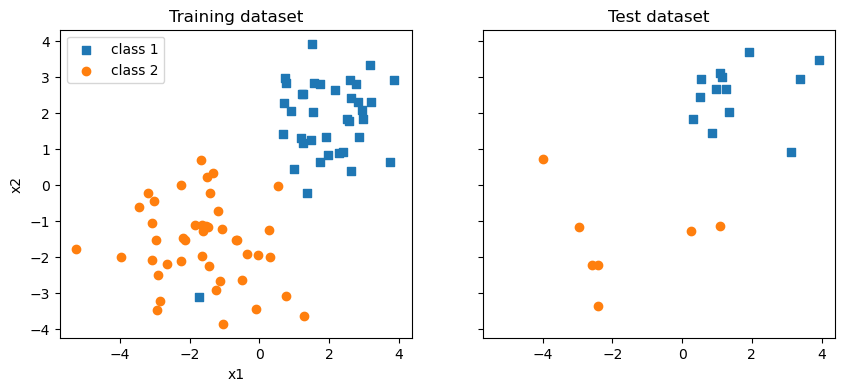

In [14]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10, 4))
ax[0].scatter(x_train[y_train==1, 0], x_train[y_train==1, 1], label='class 1', marker='s')
ax[0].scatter(x_train[y_train==0, 0], x_train[y_train==0, 1], label='class 2', marker='o')
ax[1].scatter(x_test[y_test==1, 0], x_test[y_test==1, 1], label='class 1', marker='s')
ax[1].scatter(x_test[y_test==0, 0], x_test[y_test==0, 1], label='class 2', marker='o')
ax[0].set_title('Training dataset')
ax[1].set_title('Test dataset')
ax[0].set_xlabel('x1')
ax[0].set_ylabel('x2')
ax[0].legend()
plt.show()